In [1]:
import numpy as np
import matplotlib.pyplot as plt

Letra A

In [2]:
# Dados e condições iniciais:
m = 0.4 # Massa
v0 = 40.0 # Velocidade inicial
theta = np.radians(60.0) # Ângulo de lançamento
g = 9.8 # Aceleração da Gravidade
ka = 0.025 # Arrasto

x0 = 0 # Cordenada inicial x
y0 = 0 # Cordenada inicial y
vy0 = v0*np.sin(theta) # Velocidade inicial y
vx0 = v0*np.cos(theta) # Velocidade inicial x

tf = 7.0 # Tempo final
N = 1000 # Quantidade de pontos.


# Definindo as funções do Eixo y
def fy(t, y, vy):
    return vy

def gy(t, y, vy):
    func2 = -g - ka*vy
    return func2


# Definindo as funções do Eixo x
def fx(t, x, vx):
    return vx

def gx(t, x, vx): 
    func2 = -ka*vx
    return func2



In [3]:
### Obtendo pontos da trajetória

t = np.linspace(0.0, tf, N) # Tempo
h = (t[-1]-t[0])/len(t) # Passo de tempo (precisão)

y = [y0]
x = [x0]
vy = [vy0]
vx = [vx0]
# Método de Euler Simples
for k in range(0, len(t)-1):
    # Atualizando y
    vy.append(vy[k] + h*(gy(t[k], y[k], vy[k])))
    y.append(y[k] + h*fy(t[k], y[k], vy[k]))
    # Atualizando x
    vx.append(vx[k] + h*(gx(t[k], x[k], vx[k])))
    x.append(x[k] + h*fx(t[k], x[k], vx[k]))


# Coordenadas do projétil em determinado tempo: 
def posicao(tm, x, y, h): # tempo, vetor x, vetor y, passo
    if (tm == 0):
        posx = 0
        posy = 0
    else:
        posx = x[int(tm/h)-1]
        posy = y[int(tm/h)-1]
    
    posicao = [posx, posy]
    return posicao

In [4]:
### Quais os deslocamentos em x e y em 7.0 segundos?

tm = 7.0
coordenadas = posicao(7.0, x, y, h)
deslocamentox = coordenadas[0] - x0
deslocamentoy = coordenadas[1] - y0
print(f'Deslocamento em x: {deslocamentox:.2f} metros')
print(f'Deslocamento em y: {deslocamentoy:.2f} metros')

Deslocamento em x: 128.33 metros
Deslocamento em y: -3.78 metros


Letra B

In [5]:
### Calculando para sem resistência


# Definindo as funções do Eixo y
def fys(t, y, vy):
    return vy

def gys(t, y, vy):
    func2 = -g
    return func2


# Definindo as funções do Eixo x
def fxs(t, x, vx):
    return vx

def gxs(t, x, vx): 
    func2 = 0
    return func2


ys = [y0]
xs = [x0]
vy = [vy0]
vx = [vx0]
# Método de Euler Simples
for k in range(0, len(t)-1):
    # Atualizando y
    vy.append(vy[k] + h*(gys(t[k], ys[k], vy[k])))
    ys.append(ys[k] + h*fys(t[k], ys[k], vy[k]))
    # Atualizando x
    vx.append(vx[k] + h*(gxs(t[k], xs[k], vx[k])))
    xs.append(xs[k] + h*fxs(t[k], xs[k], vx[k]))

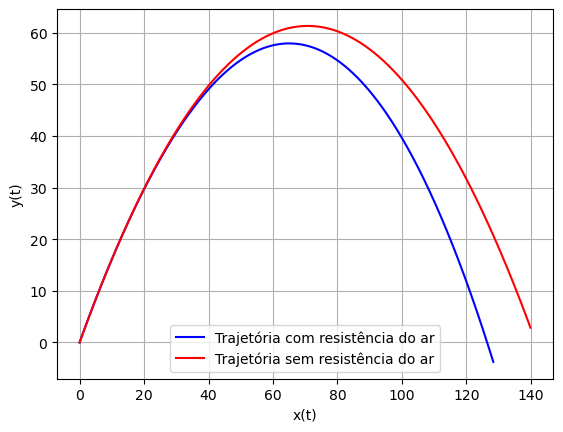

In [6]:
plt.plot(x, y, color='blue', label='Trajetória com resistência do ar')
plt.plot(xs, ys, color='red', label='Trajetória sem resistência do ar')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

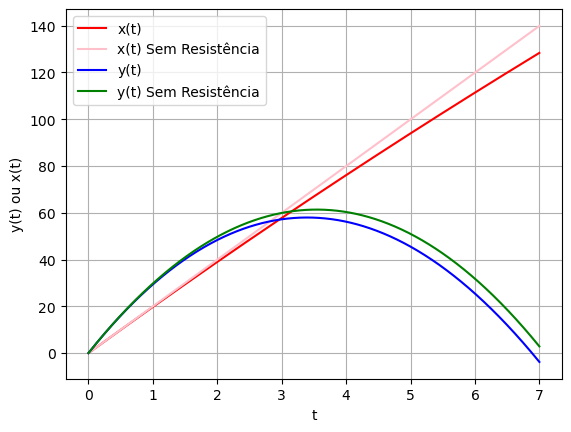

[0, 0.14000000000000004, 0.27997550000000004, 0.4199265042875001, 0.5598530171492498, 0.6997550428712488, 0.8396325857387463, 0.9794856500362421, 1.1193142400474858, 1.2591183600554776, 1.398898014342468, 1.5386532071899581, 1.6783839428787, 1.8180902256886962, 1.9577720598992008, 2.0974294497887183, 2.2370623996350054, 2.3766709137150692, 2.516254996305169, 2.6558146516808154, 2.795349884116771, 2.934860697887051, 3.0743470972649205, 3.213809086522899, 3.3532466699327577, 3.4926598517655196, 3.6320486362914606, 3.7714130277801097, 3.9107530305002483, 4.050068648719911, 4.189359886706385, 4.328626748726212, 4.467869239045185, 4.607087361928352, 4.746281121640015, 4.885450522443728, 5.0245955686023, 5.163716264377794, 5.302812614031528, 5.441884621824073, 5.5809322920152535, 5.719955628864151, 5.858954636629099, 5.99792931956769, 6.136879681936765, 6.275805727992426, 6.4147074619900275, 6.553584888184179, 6.692438010828747, 6.831266834176851, 6.97007136248087, 7.108851599992436, 7.24760

In [7]:
plt.plot(t, x, color='red', label='x(t)')
plt.plot(t, xs, color='pink', label='x(t) Sem Resistência')
plt.plot(t, y, color='blue', label='y(t)')
plt.plot(t, ys, color='green', label='y(t) Sem Resistência')
plt.xlabel('t')
plt.ylabel('y(t) ou x(t)')
plt.legend()
plt.grid()
plt.show()

print(x)
print(y)
print(xs)
print(ys)